# Logistic Regression

In this notebook we would look into the working of the Logistic Regression Model

Logistic Regression Using Gradient Descent

$$
Θ = Θ + α(y-h(ΘTX))X
$$


In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

train_path = "ds1_test.csv"

train_data = pd.read_csv(train_path)
train_data.head()

X = train_data.iloc[:, :-1].values
y = train_data.iloc[:, -1].values

# Add a bias term to the features
X = np.hstack((np.ones((X.shape[0], 1)), X))

In [120]:
parameters = train_data[["x_1", "x_2"]]
values = train_data["y"]
print(f"parameters dimension : {parameters.shape}\nvalues dimensions : {values.shape}")

parameters dimension : (100, 2)
values dimensions : (100,)


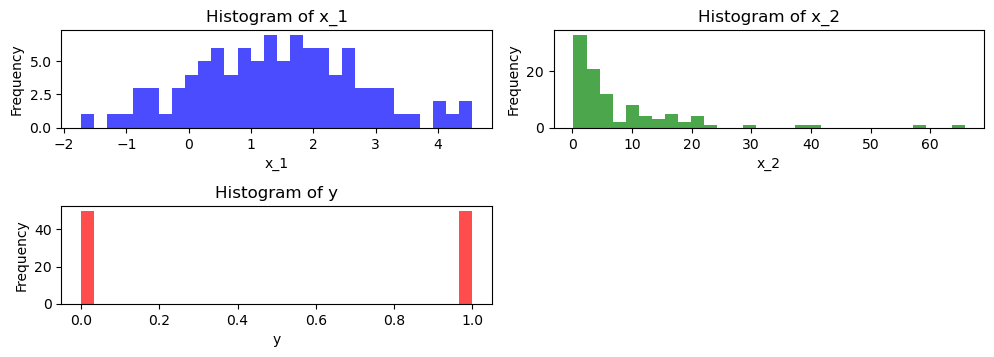

In [121]:
plt.figure(figsize=(10, 5))  # Create a new figure

# Plotting the histogram for x_1
plt.subplot(3, 2, 1)  # 1 row, 2 columns, subplot 1
plt.hist(parameters["x_1"], bins=30, color="blue", alpha=0.7)
plt.xlabel("x_1")
plt.ylabel("Frequency")
plt.title("Histogram of x_1")

# Plotting the histogram for x_2
plt.subplot(3, 2, 2)  # 1 row, 2 columns, subplot 2
plt.hist(parameters["x_2"], bins=30, color="green", alpha=0.7)
plt.xlabel("x_2")
plt.ylabel("Frequency")
plt.title("Histogram of x_2")

plt.subplot(3, 2, 3)  # 1 row, 2 columns, subplot 2
plt.hist(values, bins=30, color="red", alpha=0.7)
plt.xlabel("y")
plt.ylabel("Frequency")
plt.title("Histogram of y")

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

In [167]:
class LogisticRegressionUsingGradientDescent:
    def __init__(self, theta=None, step_size=0.0045, max_iter=10000, eps=1e-5):
        self.theta = theta
        self.step_size = step_size
        self.max_iter = max_iter
        self.eps = eps

    def calculateGradient(self, x, y):
        hx = self._sigmoid(x.dot(self.theta))
        return x.T.dot(y - hx) / len(y)

    def fit(self, x, y):
        rows, features = x.shape
        if self.theta is None:
            self.theta = np.zeros(features)

        for i in range(self.max_iter):
            previous_theta = np.copy(self.theta)
            gradient = self.calculateGradient(x, y)
            self.theta = self.theta + self.step_size * gradient
            loss = self._loss(x, y)

            print(f"Loss in iteration {i}: {loss}")
            print(f"Theta: {self.theta}")

            if np.all(np.abs(self.theta - previous_theta) < self.eps):
                print("Converged.")
                return np.copy(self.theta)
                break
        return np.copy(self.theta)

    @staticmethod
    def _sigmoid(x):
        return 1 / (1 + np.exp(-x))

    def _loss(self, x, y):
        """Get the empirical loss for logistic regression."""
        hx = self._sigmoid(x.dot(self.theta))
        loss = -np.mean(y * np.log(hx) + (1 - y) * np.log(1 - hx))

        return loss

In [165]:
gradientModel = LogisticRegressionUsingGradientDescent()
coffecients = gradientModel.fit(X, y)
print(coffecients)

Loss in iteration 0: 0.6675432859078272
Theta: [0.         0.00190569 0.01120256]
Loss in iteration 1: 0.6515253478303173
Theta: [-0.00010678  0.00353241  0.01999442]
Loss in iteration 2: 0.6409549078171457
Theta: [-0.00029392  0.0049532   0.02706744]
Loss in iteration 3: 0.6335864080625356
Theta: [-0.00054233  0.00622072  0.03291877]
Loss in iteration 4: 0.628218119707376
Theta: [-0.00083893  0.0073703   0.03787107]
Loss in iteration 5: 0.6241719029376221
Theta: [-0.00117457  0.00842607  0.04213598]
Loss in iteration 6: 0.6210405620644736
Theta: [-0.00154258  0.00940521  0.04585785]
Loss in iteration 7: 0.618565694527348
Theta: [-0.00193792  0.0103204   0.04913927]
Loss in iteration 8: 0.6165756084956479
Theta: [-0.00235669  0.01118133  0.05205589]
Loss in iteration 9: 0.6149518555449895
Theta: [-0.00279576  0.01199561  0.05466521]
Loss in iteration 10: 0.6136101633826406
Theta: [-0.00325259  0.01276934  0.05701215]
Loss in iteration 11: 0.6124890305172922
Theta: [-0.00372507  0.01350

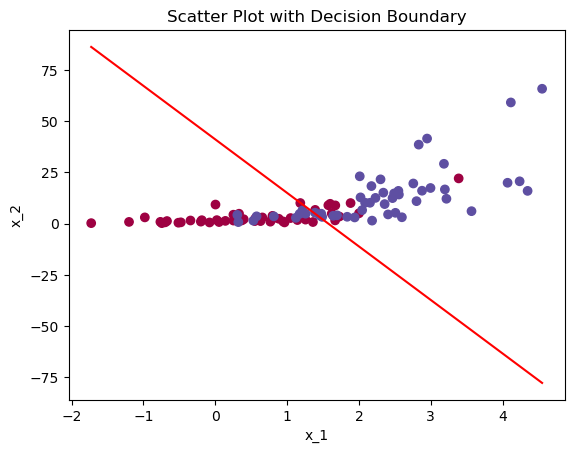

In [170]:
plt.scatter(X[:, 1], X[:, 2], c=y, cmap=plt.cm.Spectral)
plt.xlabel('x_1')
plt.ylabel('x_2')

# Plot the decision boundary (line) using the optimized theta
x_boundary = np.array([np.min(X[:, 1]), np.max(X[:, 1])])
y_boundary = -(coffecients[0] + coffecients[1] * x_boundary) / coffecients[2]
plt.plot(x_boundary, y_boundary, color='red')

plt.title('Scatter Plot with Decision Boundary')
plt.show()